#  Skin Cancer Detection


**Project Objective:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Bookmarks to Notebook Sections
1. Go to <a href=#no1>Importing all the important libraries</a><br>
2. Go to <a href=#no2>Data Preparation</a><br>
&emsp;&emsp;2.1 Go to <a href=#no2.1>Train Data Set Creation</a><br>
&emsp;&emsp;2.2 Go to <a href=#no2.2>Validation Data Set Creation</a><br>
3. Go to <a href=#no3>Visualizing the Data</a><br>
4. Go to <a href=#no4>Model 0</a><br>
&emsp;&emsp;4.1 Go to <a href=#no4.1>Creating the Model</a><br>
&emsp;&emsp;4.2 Go to <a href=#no4.2>Compiling the Model</a><br>
&emsp;&emsp;4.3 Go to <a href=#no4.3>Training the Model</a><br>
&emsp;&emsp;4.4 Go to <a href=#no4.4>Visualizing the Training Results</a><br>
&emsp;&emsp;4.5 Go to <a href=#no4.5>Observations</a><br>
5. Go to <a href=#no5>Model 1</a><br>
&emsp;&emsp;5.1 Go to <a href=#no5.1>Creating the Model</a><br>
&emsp;&emsp;5.2 Go to <a href=#no5.2>Compiling the Model</a><br>
&emsp;&emsp;5.3 Go to <a href=#no5.3>Training the Model</a><br>
&emsp;&emsp;5.4 Go to <a href=#no5.4>Visualizing the Training Results</a><br>
&emsp;&emsp;5.5 Go to <a href=#no5.5>Observations</a><br>
6. Go to <a href=#no6>Data Augmentation</a><br>
&emsp;&emsp;6.1 Go to <a href=#no6.1>Specifying the Augmentation</a><br>
&emsp;&emsp;6.2 Go to <a href=#no6.2>Visualizing the Augmented Data</a><br>
7. Go to <a href=#no7>Model 2</a><br>
&emsp;&emsp;7.1 Go to <a href=#no7.1>Creating the Model</a><br>
&emsp;&emsp;7.2 Go to <a href=#no7.2>Compiling the Model</a><br>
&emsp;&emsp;7.3 Go to <a href=#no7.3>Training the Model</a><br>
&emsp;&emsp;7.4 Go to <a href=#no7.4>Visualizing the Training Results</a><br>
&emsp;&emsp;7.5 Go to <a href=#no7.5>Observations</a><br>
8. Go to <a href=#no8>Checking for Class Imbalance</a><br>
9. Go to <a href=#no9>Using Augmentor for Class Imbalance Treatment</a><br>
&emsp;&emsp;9.1 Go to <a href=#no9.1>Installing Augmentor</a><br>
&emsp;&emsp;9.2 Go to <a href=#no9.2>Using Augmentor</a><br>
&emsp;&emsp;9.3 Go to <a href=#no9.3>Observations</a><br>
10. Go to <a href=#no10>Modelling Data using Augmentor</a><br>
&emsp;&emsp;10.1 Go to <a href=#no10.1>Creating the Train Data Set</a><br>
&emsp;&emsp;10.2 Go to <a href=#no10.2>Creating the Validation Data Set</a><br>
11. Go to <a href=#no11>Model 3</a><br>
&emsp;&emsp;11.1 Go to <a href=#no11.1>Creating the Model</a><br>
&emsp;&emsp;11.2 Go to <a href=#no11.2>Compiling the Model</a><br>
&emsp;&emsp;11.3 Go to <a href=#no11.3>Training the Model</a><br>
&emsp;&emsp;11.4 Go to <a href=#no11.4>Visualizing the Training Results</a><br>
&emsp;&emsp;11.5 Go to <a href=#no11.5>Observations</a><br>

## 1. Importing all the important libraries <a name='no1' />

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
#from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [3]:

## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This dataset has about 2386 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
train_path="gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
test_path="gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2268
118


## 2. Data Preparation <a name='no2' />

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

### 2.1 Train Data Set Creation <a name='no2.1' />

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False)

Found 2268 files belonging to 9 classes.
Using 1815 files for training.


### 2.2 Validation Data Set Creation <a name='no2.2' />

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False
)

Found 2268 files belonging to 9 classes.
Using 453 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## 3. Visualizing the data <a name='no3' />

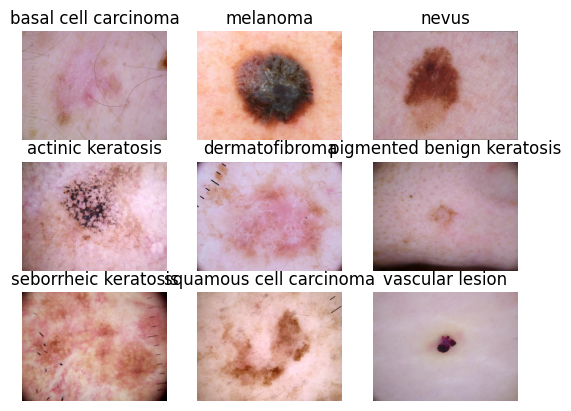

In [17]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Model 0 <a name='no4' />

### 4.1 Creating the model <a name='no4.1' />

In [19]:
model=Sequential([
    tf.keras.layers.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4.2 Compiling the model <a name='no4.2' />

In [20]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###  4.3 Training the model <a name='no4.3' />

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 757s 3s/step - accuracy: 0.1842 - loss: 3.7933 - val_accuracy: 0.3510 - val_loss: 2.0322
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3981 - loss: 1.7501 - val_accuracy: 0.4834 - val_loss: 1.6489
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4642 - loss: 1.5414 - val_accuracy: 0.4084 - val_loss: 1.6412
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5086 - loss: 1.4618 - val_accuracy: 0.4592 - val_loss: 1.5511
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5535 - loss: 1.3420 - val_accuracy: 0.5121 - val_loss: 1.4278
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5364 - loss: 1.3089 - val_accuracy: 0.5033 - val_loss: 1.3805
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5712 - loss: 1.2045 - val_accuracy: 0.4724 - val_loss: 1.4634
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6096 - loss: 1.1415 - val_accuracy: 0.5673 - v

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,588,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,828,445 (190.08 MB)

 Trainable params: 16,609,481 (63.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,218,964 (126.72 MB)

###  4.4 Visualizing training results <a name='no4.4' />

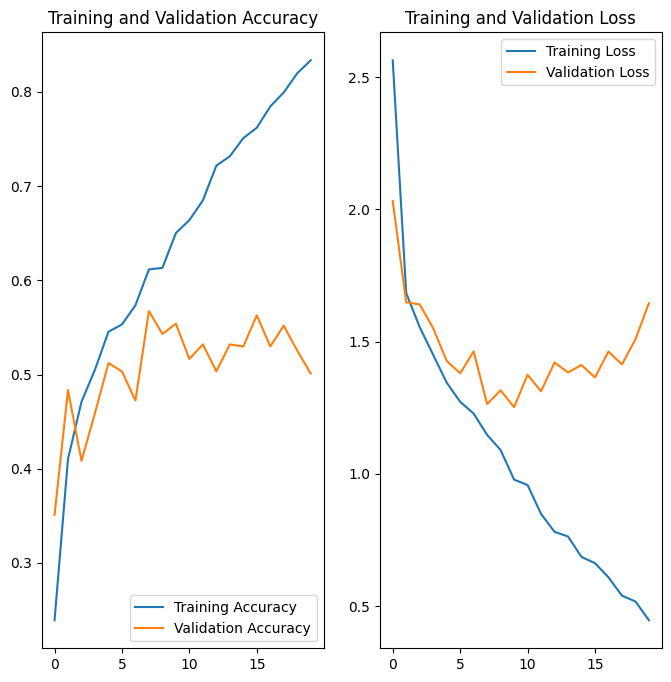

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###  4.5 Observations <a name='no4.5' />

-  The accuracy of the model for the **Training data set** is at **85%**. But the **Validation accuracy** is not in par with the training accuracy. It is only at **50%**.
-The validation loss as observed is very high.
-  This could also be indicative of some **Overfit** in the model.
-  We could add some `Dropout` layers and remove the `BatchNormalization` layers.
-  And by adding a few more layers, we could improve the accuracy by trying to extract more features.

##  5. Model 1 <a name='no5' />

###  5.1 Creating the Model <a name='no5.1' />

In [24]:
model_update=Sequential([
    tf.keras.layers.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### 5.2 Compiling the model <a name='no5.2' />

In [27]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###  5.3 Training the model <a name='no5.3' />

In [28]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 360ms/step - accuracy: 0.1671 - loss: 2.3377 - val_accuracy: 0.1921 - val_loss: 2.0858
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.1963 - loss: 2.0587 - val_accuracy: 0.1921 - val_loss: 2.0355
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.1914 - loss: 2.0226 - val_accuracy: 0.1921 - val_loss: 2.0269
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.2203 - loss: 2.0227 - val_accuracy: 0.1921 - val_loss: 2.0336
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.2013 - loss: 2.0174 - val_accuracy: 0.2384 - val_loss: 2.0217
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.2546 - loss: 2.0029 - val_accuracy: 0.1921 - val_loss: 2.0583
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.2233 - loss: 2.0225 - val_accuracy: 0.2185 - val_loss: 2.0053
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.2324 - loss: 1.9558 - val_accuracy: 0.2892 -

###  5.4 Visualizing the results <a name='no5.4' />

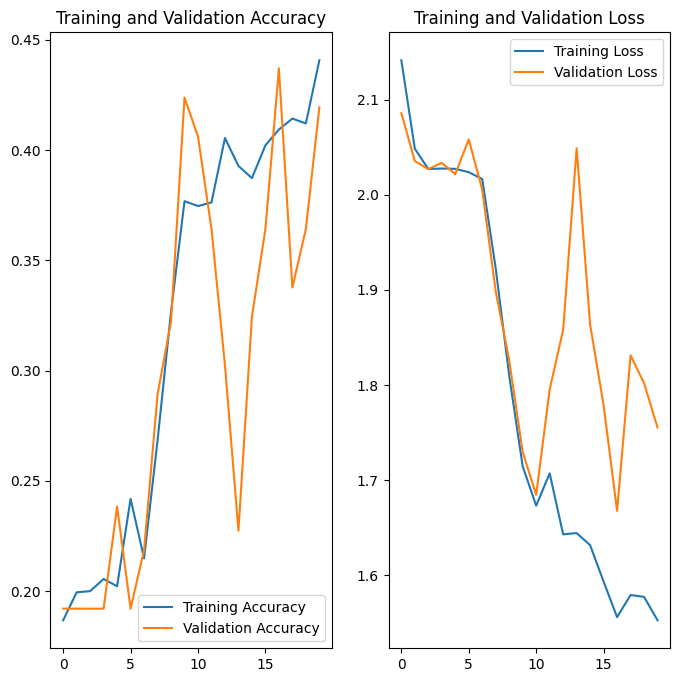

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###  5.5 Observations <a name='no5.5' />

-  The model accuracy for **Train data set** has dropped to nearly **45%**.
-  The accuracy for the **Validation set** is at **40%**.
-  This is a much better model compared to the previous model as there seems to be **No Overfit** with the training accuracy **45%** and validation accuracy at **40%**.

##  6. Data Augmentation <a name='no6' />

###  6.1 Specifying the Augmentation <a name='no6.1' />

In [33]:
data_augmentation=tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])

###  6.2 Visualizing the Augmented Data <a name='no6.2' />

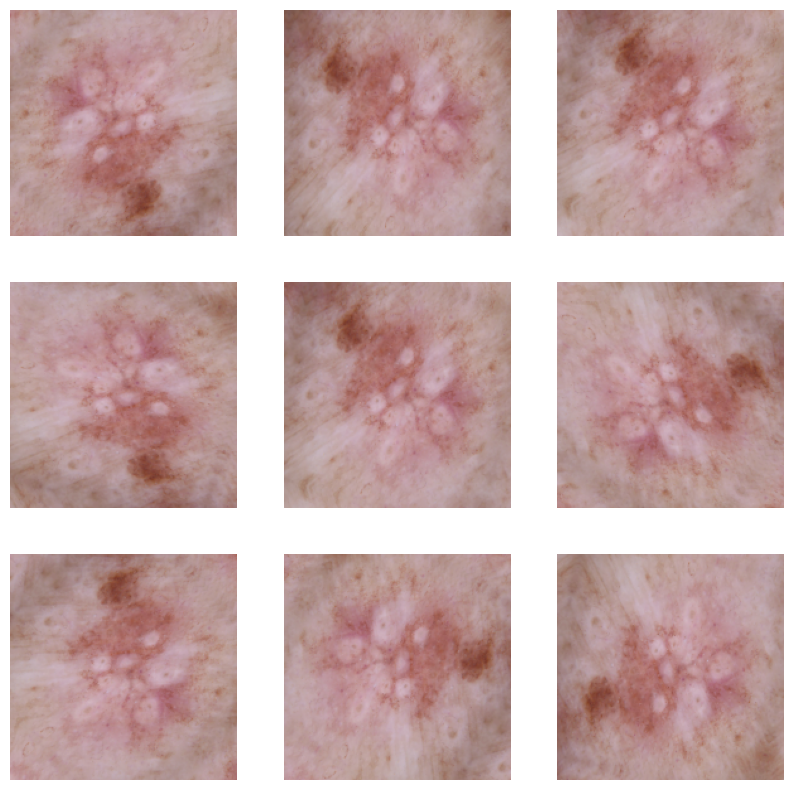

In [34]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)
  plt.imshow((augmented_image1))
  plt.axis("off")

## 7. Model 2 <a name='no7' />

###  7.1 Creating the Model <a name='no7.1' />

In [35]:
model_augmented=Sequential([
    tf.keras.layers.Rescaling(scale=1./255., offset=0.0,),

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 7.2 Compiling the model <a name='no7.2' />

In [36]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 7.3 Training the model <a name='no7.3' />

In [37]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 208ms/step - accuracy: 0.2049 - loss: 2.1608 - val_accuracy: 0.1921 - val_loss: 2.0404
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.1976 - loss: 2.0283 - val_accuracy: 0.1921 - val_loss: 2.0324
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.2315 - loss: 2.0336 - val_accuracy: 0.2031 - val_loss: 2.0148
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.2525 - loss: 1.9636 - val_accuracy: 0.2428 - val_loss: 1.9794
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.2883 - loss: 1.8876 - val_accuracy: 0.3002 - val_loss: 1.8478
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.3101 - loss: 1.8376 - val_accuracy: 0.3488 - val_loss: 1.8262
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.3636 - loss: 1.7635 - val_accuracy: 0.3400 - val_loss: 1.7044
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.3534 - loss: 1.7688 - val_accurac

### 7.4 Visualizing the results <a name='no7.4' />

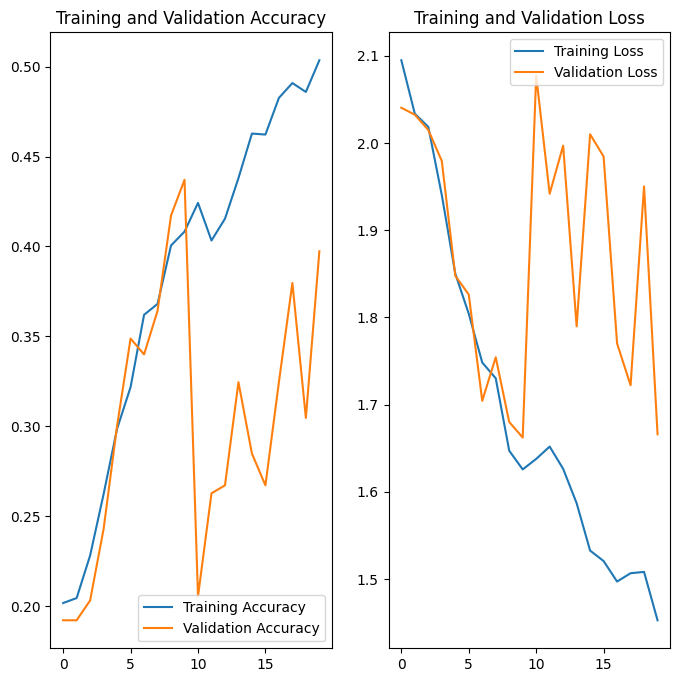

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 7.5  Observations <a name='no7.5' />

-  The model accuracy for **Train data set** has gone up to nearly **48%**.
-  The accuracy for the **Validation set** is also at **40%**.
-Checking for classs imbalance

## 8. Checking for Class Imbalance <a name='no8' />

In [39]:
for i in class_names:
    directory =train_path+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 124 samples.
basal cell carcinoma has 388 samples.
dermatofibroma has 95 samples.
melanoma has 440 samples.
nevus has 357 samples.
pigmented benign keratosis has 465 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 141 samples.


-  The samples of various classes are not in equal proportion.
-  There is a significant **Class Imbalance** observed.
-  The class with the least number of samples is `Seborrheic Keratosis` with **77**.
-  The class that dominates the data in terms of proportionate number of samples is `Pigmented Benign Keratosis` with sample size of **465**.

## 9. Using Augmentor for Class Imbalance Treatment <a name='no9' />

###  9.1 Installing Augmentor <a name='no9.1' />

In [40]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


### 9.2 Using Augmentor <a name='no9.2' />

In [41]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 124 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x798B17C82D70>: 100%|██████████| 500/500 [00:18<00:00, 26.64 Samples/s]


Initialised with 388 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x798B17BB3580>: 100%|██████████| 500/500 [00:20<00:00, 24.04 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x798B17BA7F70>: 100%|██████████| 500/500 [00:19<00:00, 25.41 Samples/s]


Initialised with 440 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x798B17B8BE20>: 100%|██████████| 500/500 [01:21<00:00,  6.13 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x798B1AA545E0>: 100%|██████████| 500/500 [01:16<00:00,  6.52 Samples/s]


Initialised with 465 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x798BA6371540>: 100%|██████████| 500/500 [00:19<00:00, 26.15 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x798B18F410C0>: 100%|██████████| 500/500 [00:40<00:00, 12.38 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x798B18596AA0>: 100%|██████████| 500/500 [00:17<00:00, 28.03 Samples/s]


Initialised with 141 image(s) found.
Output directory set to gdrive/My Drive/CNN Assignment_/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x798B1AFB4280>: 100%|██████████| 500/500 [00:20<00:00, 23.98 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [43]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [45]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [46]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 624 samples.
basal cell carcinoma has 888 samples.
dermatofibroma has 595 samples.
melanoma has 940 samples.
nevus has 857 samples.
pigmented benign keratosis has 965 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 641 samples.


### 9.3 Observations <a name='no9.3' />

-  The Augmentor has **helped decrease the imbalance** in class images and that can be viewed from above.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

##  10. Modelling Augmented Data <a name='no10' />

In [47]:
batch_size = 32
img_height = 180
img_width = 180

### 10.1 Creating the Train Data Set <a name='no10.1' />

In [48]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6768 files belonging to 9 classes.
Using 5415 files for training.


### 10.2 Creating the Validation Data Set <a name='no10.2' />

In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6768 files belonging to 9 classes.
Using 1353 files for validation.


## 11. Model 3 <a name='no11' />

### 11.1 Creating the Model <a name='no11.1' />

In [50]:
model_final=Sequential([
    tf.keras.layers.Rescaling(scale=1./255., offset=0.0,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 11.2 Compiling the Model <a name='no11.2' />

In [51]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 11.3 Training the Model <a name='no11.3' />

In [52]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 50s 271ms/step - accuracy: 0.1658 - loss: 2.5949 - val_accuracy: 0.2572 - val_loss: 1.9102
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 73s 235ms/step - accuracy: 0.3419 - loss: 1.7263 - val_accuracy: 0.4287 - val_loss: 1.5012
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 42s 247ms/step - accuracy: 0.4471 - loss: 1.4827 - val_accuracy: 0.5152 - val_loss: 1.2736
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 42s 245ms/step - accuracy: 0.5189 - loss: 1.2718 - val_accuracy: 0.5565 - val_loss: 1.2129
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 79s 228ms/step - accuracy: 0.5876 - loss: 1.1271 - val_accuracy: 0.6009 - val_loss: 1.0980
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.6409 - loss: 0.9699 - val_accuracy: 0.6482 - val_loss: 0.9928
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 83s 247ms/step - accuracy: 0.7001 - loss: 0.8233 - val_accuracy: 0.6778 - val_loss: 0.9102
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 38s 223ms/step - accuracy: 0.7385 - loss: 0

###  11.4 Visualizing the model results <a name='no11.4' />

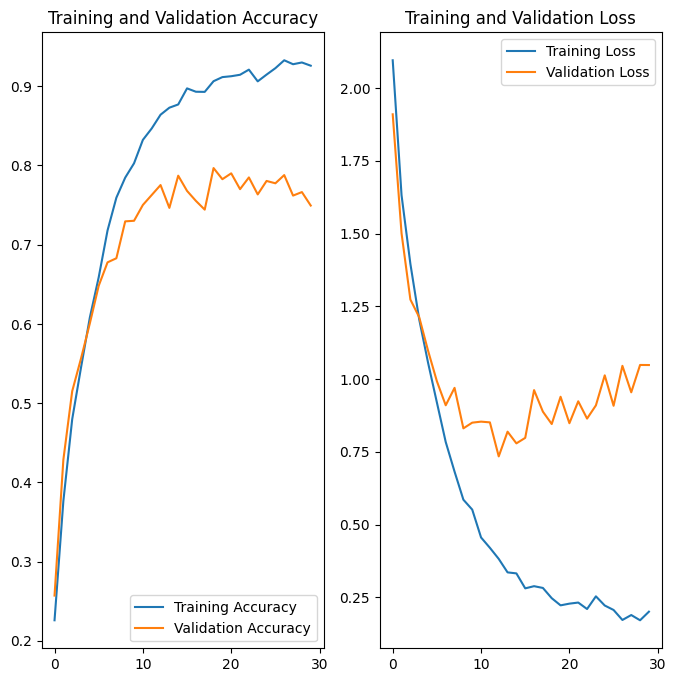

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 11.5 Observations <a name='no11.5' />

-  The training accuracy seems to be nearly **~90%**.
-  The validation accuracy is nearly **~75%**.
-  Though the model accuracy has improved, the **class rebalance** has helped **treat the overfitting to some extent**.
-  Much better models could be built or tried out using **more epochs and more layers**.